In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df=pd.read_csv('test.csv')

In [5]:
train_df.shape

(244745, 8)

In [6]:
test_df.shape

(9914, 7)

In [7]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244745 entries, 0 to 244744
Data columns (total 8 columns):
key                  244745 non-null object
fare_amount          244745 non-null float64
pickup_datetime      244745 non-null object
pickup_longitude     244745 non-null float64
pickup_latitude      244745 non-null float64
dropoff_longitude    244744 non-null float64
dropoff_latitude     244743 non-null float64
passenger_count      244744 non-null float64
dtypes: float64(6), object(2)
memory usage: 14.9+ MB


In [10]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [12]:
train_df['pickup_datetime'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [13]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,244745.000000,244745.000000,244745.000000,244744.000000,244743.000000,244744.000000
mean,11.352251,-72.526857,39.929685,-72.530173,39.931696,1.682836
std,9.884935,11.516093,9.441663,10.628218,6.625444,1.306613
min,-44.900000,-740.000000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992040,40.735010,-73.991330,40.734065,1.000000
50%,8.500000,-73.981762,40.752768,-73.980087,40.753197,1.000000
75%,12.500000,-73.967075,40.767133,-73.963574,40.768054,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [14]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     2
passenger_count      1
dtype: int64

In [16]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

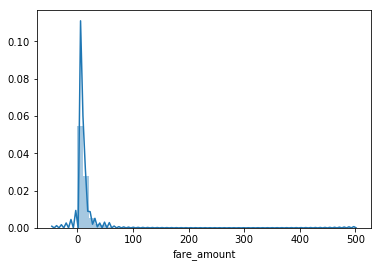

In [20]:
sns.distplot(train_df['fare_amount'])

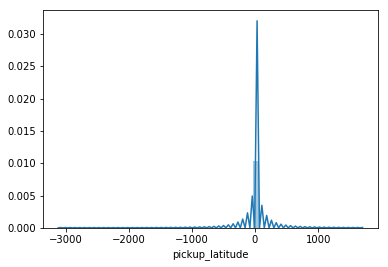

In [21]:
sns.distplot(train_df['pickup_latitude'])

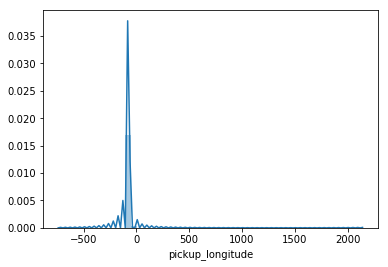

In [22]:
sns.distplot(train_df['pickup_longitude'])

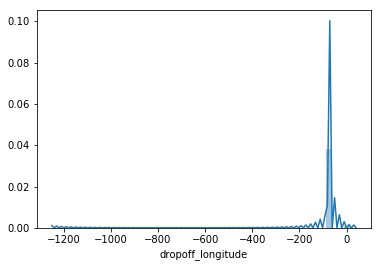

In [24]:
sns.distplot(train_df['dropoff_longitude'])

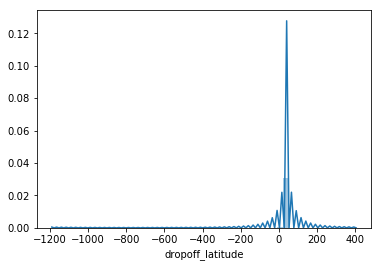

In [26]:
sns.distplot(train_df['dropoff_latitude'])

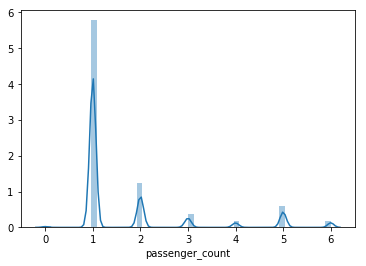

In [27]:
sns.distplot(train_df['passenger_count'])

In [28]:
test_df.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [29]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [30]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [31]:
tempdf=train_df[(train_df['dropoff_latitude']<min_latitude)|(train_df['pickup_latitude']<min_latitude)|(train_df['dropoff_longitude']<min_longitude)|(train_df['pickup_longitude']<min_longitude)|(train_df['dropoff_latitude']>max_latitude)|(train_df['pickup_latitude']>max_latitude)|(train_df['dropoff_longitude']>max_longitude)|(train_df['pickup_longitude']>max_longitude)]

In [32]:
print('before dropping',train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print('after droping', train_df.shape)

before dropping (244743, 8)
after droping (239595, 8)


In [37]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [38]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,Tuesday,3,2010


In [39]:
train_df.weekday=train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [40]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,15,17,1,6,2009
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,2,1,2010
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,4,8,2011
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,6,4,2012
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,2,3,2010
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,6,9,4,1,2011
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,20,20,2,11,2012
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0,4,17,3,1,2012
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0,3,13,1,12,2012
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2,1,3,9,2009


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239595 entries, 0 to 244743
Data columns (total 13 columns):
key                  239595 non-null object
fare_amount          239595 non-null float64
pickup_datetime      239595 non-null datetime64[ns, UTC]
pickup_longitude     239595 non-null float64
pickup_latitude      239595 non-null float64
dropoff_longitude    239595 non-null float64
dropoff_latitude     239595 non-null float64
passenger_count      239595 non-null float64
day                  239595 non-null int64
hour                 239595 non-null int64
weekday              239595 non-null int64
month                239595 non-null int64
year                 239595 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(5), object(1)
memory usage: 25.6+ MB


In [42]:
train_df=train_df[train_df['passenger_count']<=8]

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239595 entries, 0 to 244743
Data columns (total 13 columns):
key                  239595 non-null object
fare_amount          239595 non-null float64
pickup_datetime      239595 non-null datetime64[ns, UTC]
pickup_longitude     239595 non-null float64
pickup_latitude      239595 non-null float64
dropoff_longitude    239595 non-null float64
dropoff_latitude     239595 non-null float64
passenger_count      239595 non-null float64
day                  239595 non-null int64
hour                 239595 non-null int64
weekday              239595 non-null int64
month                239595 non-null int64
year                 239595 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(5), object(1)
memory usage: 25.6+ MB


In [44]:
train_df.drop(['key','pickup_datetime'],axis=1, inplace=True)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239595 entries, 0 to 244743
Data columns (total 11 columns):
fare_amount          239595 non-null float64
pickup_longitude     239595 non-null float64
pickup_latitude      239595 non-null float64
dropoff_longitude    239595 non-null float64
dropoff_latitude     239595 non-null float64
passenger_count      239595 non-null float64
day                  239595 non-null int64
hour                 239595 non-null int64
weekday              239595 non-null int64
month                239595 non-null int64
year                 239595 non-null int64
dtypes: float64(6), int64(5)
memory usage: 21.9 MB


In [47]:
train_df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
hour                 0
weekday              0
month                0
year                 0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=train_df.drop('fare_amount',axis=1)

In [51]:
y=train_df['fare_amount']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [53]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
223335,-73.983186,40.766776,-73.989447,40.769504,1.0,11,13,5,2,2011
165022,-73.987819,40.728519,-73.974142,40.684553,1.0,17,21,6,12,2011
232205,-73.983003,40.766420,-73.982313,40.760165,5.0,28,10,3,9,2011
200283,-73.990663,40.718347,-73.983114,40.763677,1.0,18,9,5,2,2011
189501,-73.985522,40.739730,-73.994130,40.729233,1.0,9,12,3,1,2013


In [54]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
242507,-73.972617,40.758802,-73.979152,40.785057,3.0,22,16,2,12,2009
134040,-73.988615,40.749633,-73.988127,40.749683,1.0,4,12,2,5,2010
63764,-73.983868,40.754658,-73.983453,40.760392,1.0,17,22,5,9,2010
160454,-73.985156,40.748198,-73.989420,40.717909,1.0,19,12,4,2,2009
49446,-73.982577,40.743452,-73.991415,40.738545,5.0,5,8,1,11,2012


In [55]:
x_train.shape

(191676, 10)

In [56]:
x_test.shape

(47919, 10)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
predictedvalues = lr.predict(x_test)

In [61]:
predictedvalues

array([ 8.09274032,  8.23879186,  8.40814926, ...,  9.80889662,
       10.49383558, 12.55708036])

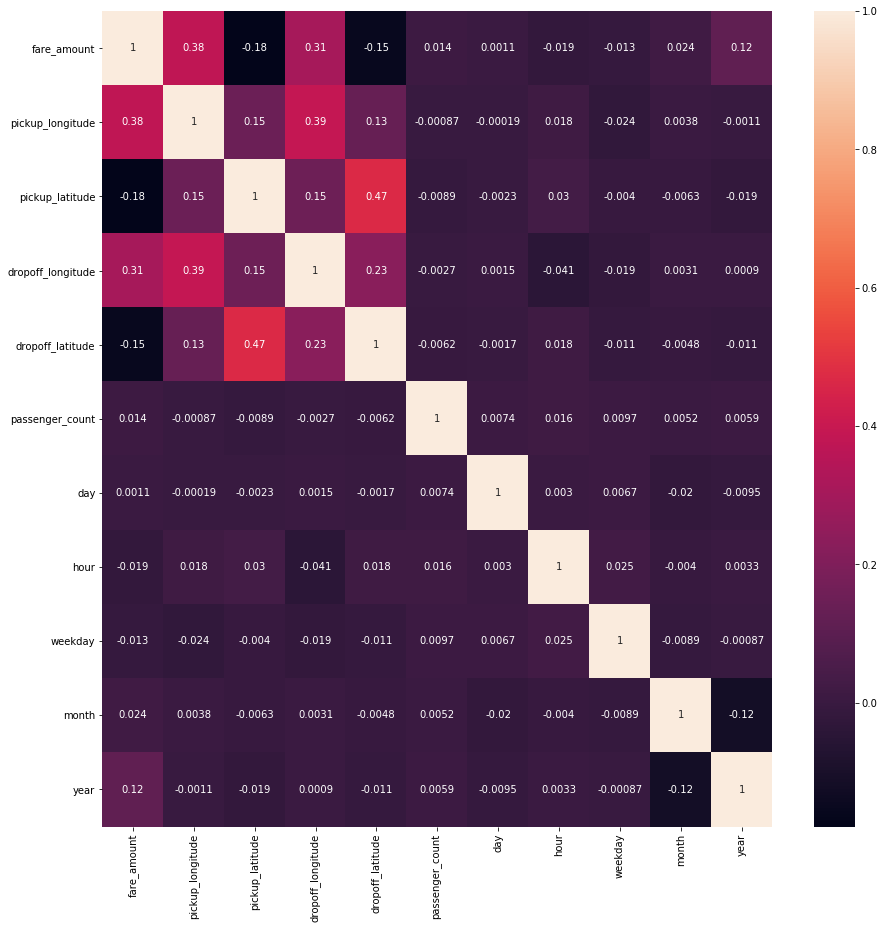

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(), annot=True)

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predictedvalues,y_test))

8.47833023290626

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [69]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [70]:
np.sqrt(mean_squared_error(rfrmodel_pred,y_test))

4.289232320195473